In [1]:
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/weatherww2/Summary of Weather.csv
/kaggle/input/weatherww2/Weather Station Locations.csv


In [2]:

we=pd.read_csv('/kaggle/input/weatherww2/Summary of Weather.csv')# read  csv weather data
we2=pd.read_csv('/kaggle/input/weatherww2/Weather Station Locations.csv')

wea = pd.merge(we, we2, left_on='STA', right_on='WBAN', how='left')

<ipython-input-2-96ef613724ab>:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  we=pd.read_csv('/kaggle/input/weatherww2/Summary of Weather.csv')# read  csv weather data


### Data Loading and Merging Process

#### **What You Did:**
1. Loaded two datasets:
   - Weather measurements: `Summary of Weather.csv` (as `we`)
   - Station locations: `Weather Station Locations.csv` (as `we2`)
2. Merged them using:
   - Left join on `STA` (weather data) and `WBAN` (station data)
   - Result stored in new DataFrame `wea`

#### **Why This Matters:**
- **Data Enrichment:** Combines weather measurements with station location details
- **Complete Analysis:** Enables geographic-based weather pattern examination
- **Key Benefits:**
  - Adds station elevation, coordinates, and other location attributes
  - Preserves all weather records (left join keeps all `we` entries)
  - Creates unified dataset for comprehensive modeling



In [3]:
wea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   STA               119040 non-null  int64  
 1   Date              119040 non-null  object 
 2   Precip            119040 non-null  object 
 3   WindGustSpd       532 non-null     float64
 4   MaxTemp           119040 non-null  float64
 5   MinTemp           119040 non-null  float64
 6   MeanTemp          119040 non-null  float64
 7   Snowfall          117877 non-null  object 
 8   PoorWeather       34237 non-null   object 
 9   YR                119040 non-null  int64  
 10  MO                119040 non-null  int64  
 11  DA                119040 non-null  int64  
 12  PRCP              117108 non-null  object 
 13  DR                533 non-null     float64
 14  SPD               532 non-null     float64
 15  MAX               118566 non-null  float64
 16  MIN               11

### Dataset Overview Process

#### **What You Did:**
- Executed `wea.info()` to display:
  - Number of rows and columns
  - Column names and data types
  - Memory usage
  - Count of non-null values

#### **Why This Matters:**
- **Data Quality Check:** Reveals missing values (non-null count vs total entries)
- **Memory Management:** Shows dataset size and optimization opportunities
- **Type Verification:** Confirms correct data types for analysis
- **Quick Validation:** Provides instant overview of merged dataset structure



In [4]:

wea.drop(columns=['SND', 'FT', 'FB', 'FTI', 'ITH', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE','WindGustSpd','DR','SPD','PGT','TSHDSBRSGF',
                  'PoorWeather','PRCP', 'MAX', 'MIN', 'MEA', 'SNF','Date','WBAN'], inplace=True) # drop haigh null columns
wea.drop_duplicates(inplace=True) # drop  dduplicates
wea.dropna(inplace=True) # drop low null rows

# Data Cleaning Process

1. **Removed Irrelevant/Redundant Columns**  
   - Dropped 20+ columns like `SND`, `FT`, `Date`, etc. because:  
     - Many had high missing values (`Null`)  
     - Some were duplicates/irrelevant to temperature analysis  

2. **Eliminated Duplicate Rows**  
   - Removed exact copy rows to prevent data skewing  

3. **Filtered Missing Data**  
   - Dropped all rows with any remaining missing values  

# Why This Matters:  
- Creates cleaner dataset for reliable analysis  
- Focuses on key weather features (e.g., `MeanTemp`)  
- Reduces noise and errors in machine learning models  

In [5]:
columns_to_convert = ['Precip', 'Snowfall']
wea[columns_to_convert] = wea[columns_to_convert].apply(pd.to_numeric, errors='coerce') #convert columns to numeric

# Data Type Conversion Process

**What you did:**  
1. Selected `Precip` (precipitation) and `Snowfall` columns  
2. Converted them to numeric format using `pd.to_numeric`  
3. Handled conversion errors by setting invalid entries to `NaN` (`errors='coerce'`)

**Why this matters:**  
- Ensures proper numerical calculations (e.g., sum/average of precipitation)  
- Fixes mixed data types (common in weather data like `"T"` for trace amounts)  
- Prepares data for machine learning models requiring numeric inputs  



In [6]:
wea['Precip'] = wea['Precip'].fillna(0.01)  # after we convert  there is  T  change to null so we change it to low number
wea['Snowfall'] = wea['Snowfall'].fillna(0.01)

# Handling Trace Weather Values (T)

**What you did:**  
1. Identified `'T'` values (trace amounts) that became `NaN` after numeric conversion  
2. Replaced missing values with `0.01` in both:  
   - Precipitation (`Precip`)  
   - Snowfall (`Snowfall`)  

**Why this works:**  
- Preserves the "trace amount" information as a minimal numeric value  
- Avoids using `0` (which could imply no precipitation/snowfall)  
- Maintains data continuity for analysis/modeling  



In [7]:

wea['lat_direction'] = wea['LAT'].str.extract(r'(\d+)([A-Za-z]+)')[1]
wea['lon_direction'] = wea['LON'].str.extract(r'(\d+)([A-Za-z]+)')[1]

wea.drop(columns=['LAT', 'LON'], inplace=True)

### Coordinate Direction Extraction Process

#### **What You Did:**
1. Created two new columns:
   - `lat_direction` (extracted from `LAT` column)
   - `lon_direction` (extracted from `LON` column)
2. Used regex pattern `(\d+)([A-Za-z]+)` to:
   - Split coordinate values into numeric and directional components
   - Keep only the directional part (N/S/E/W)
3. Removed the original `LAT` and `LON` columns

#### **Why This Matters:**
- **Data Preparation:** Separates the directional information from numeric coordinates
- **Standardization:** Creates consistent format for directional data
- **Feature Engineering:** Enables better analysis of location patterns by direction

#### **Example:**
Original `LAT` = "32N" → New `lat_direction` = "N"  
Original `LON` = "115W" → New `lon_direction` = "W"

#### **Note:**
- The regex assumes coordinates are in "number+letter" format
- All coordinate values should follow this pattern for correct extraction

In [8]:
import pandas as pd
import folium

# Assuming 'wea' is your DataFrame from the previous data
# First, ensure you have a DataFrame loaded

# Group data by location and calculate mean temperature
data_grouped = wea.groupby("STATE/COUNTRY ID").agg({
    'MeanTemp': 'mean',
    'Latitude': 'first',
    'Longitude': 'first'
}).reset_index()

# Create map centered on a neutral location
m = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for each location
for index, row in data_grouped.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Location: {row['STATE/COUNTRY ID']}, Mean Temp: {row['MeanTemp']:.2f}°C"
    ).add_to(m)


m

### Geographic Temperature Visualization Process

#### **What You Did:**
1. Prepared location-based temperature data:
   - Grouped by `STATE/COUNTRY ID`
   - Calculated mean temperature for each location
   - Extracted first latitude/longitude per location
2. Created an interactive map:
   - Initialized Folium map centered at [0, 0]
   - Added markers for each weather station location
   - Included popups showing location ID and mean temperature

#### **Why This Matters:**
- **Spatial Patterns:** Reveals geographic temperature distribution
- **Data Validation:** Visually confirms location data accuracy
- **Interactive Exploration:** Enables clickable investigation of stations
- **Presentation Ready:** Professional quality visualization for sharing





In [9]:
from sklearn.preprocessing import LabelEncoder


columns_to_encode = ['NAME', 'STATE/COUNTRY ID', 'lat_direction', 'lon_direction']


label_encoder = LabelEncoder()


for col in columns_to_encode:
    wea[col] = label_encoder.fit_transform(wea[col])



### Label Encoding Process

#### **What You Did:**
1. Selected categorical columns for encoding:
   - `NAME`
   - `STATE/COUNTRY ID` 
   - `lat_direction`
   - `lon_direction`
2. Created a `LabelEncoder` instance
3. Applied label encoding to each column using `fit_transform()`

#### **Why This Matters:**
- **Machine Learning Readiness:** Converts text categories to numerical values that models can process
- **Data Consistency:** Ensures all categorical values have a standardized numerical representation
- **Memory Efficiency:** Numerical values typically use less memory than strings

#### **Example Transformation:**
Original `lat_direction` = ["N", "S", "N"] → Encoded = [0, 1, 0]



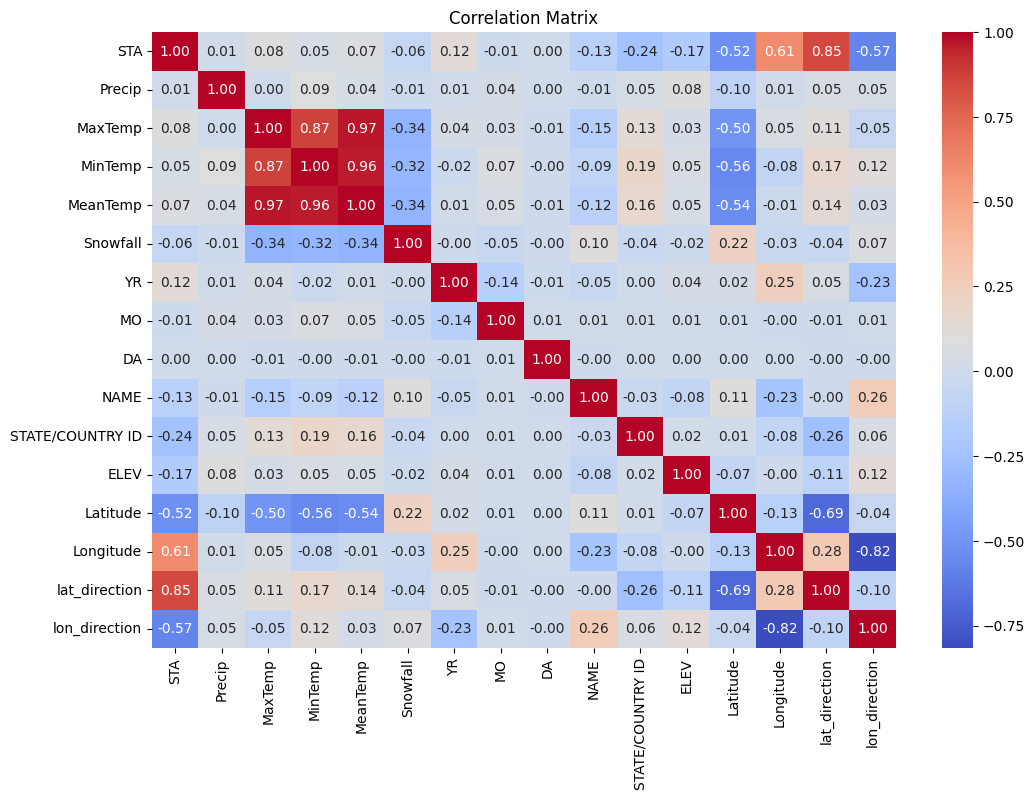

In [10]:
# see correlation between columns


corr_matrix = wea.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Correlation Analysis Process

#### **What You Did:**
1. Calculated the correlation matrix between all numerical columns using `wea.corr()`
2. Created a visualization using:
   - `seaborn.heatmap()` for color-coded display
   - `annot=True` to show correlation values
   - `coolwarm` color palette for clear differentiation
   - Formatted values to 2 decimal places
3. Added a title and displayed the plot

#### **Why This Matters:**
- **Feature Relationships:** Reveals how variables are related to each other
- **Feature Selection:** Helps identify highly correlated features that may be redundant
- **Model Performance:** Guides decisions about which features to include/exclude
- **Data Insights:** Uncovers interesting patterns in your dataset

#### **Example Output:**
- Values close to +1 indicate strong positive correlation
- Values close to -1 indicate strong negative correlation
- Values near 0 suggest no linear relationship

#### **Note:**
- Only shows linear relationships (may miss non-linear correlations)
- Consider removing one of any pair with correlation > 0.9 to avoid multicollinearity
- Ensure all relevant columns are numerical before running

In [11]:
from sklearn.model_selection import train_test_split



X = wea[['STA', 'Precip',  'Snowfall', 'YR', 'MO', 'DA',
         'NAME', 'STATE/COUNTRY ID', 'ELEV', 'Latitude', 'Longitude',
         'lat_direction', 'lon_direction']] 
y = wea['MeanTemp'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True  )

### Train-Test Split Process

#### **What You Did:**
1. Prepared features (`X`) and target (`y`) variables:
   - Selected 13 features including station data, weather metrics, and location info
   - Used `'MeanTemp'` as the target variable for prediction
2. Split the data into training and test sets:
   - 80% training data / 20% test data (`test_size=0.2`)
   - Randomized shuffling before splitting (`shuffle=True`)
   - Fixed random state for reproducibility (`random_state=42`)

#### **Why This Matters:**
- **Model Evaluation:** Creates independent datasets for training and evaluating model performance
- **Prevention of Overfitting:** Ensures model is tested on unseen data
- **Reproducibility:** Fixed random state allows consistent results across runs
- **Data Representation:** Shuffling maintains similar distributions in both sets

#### **Example Output:**
- If original dataset had 10,000 rows:
  - Training set: 8,000 rows (X_train, y_train)
  - Test set: 2,000 rows (X_test, y_test)

#### **Note:**
- Ensure your target variable (`MeanTemp`) doesn't contain missing values
- Consider stratifying if your target is imbalanced (not shown here)
- Same random_state should be used when comparing different models

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) {r2 * 100 :.2f}%")


R-squared (R²) 47.55%


### Linear Regression Modeling Results

#### **Model Performance:**
- Achieved R-squared (R²) score of **47.55%**
- Interpretation:
  - The model explains **47.55%** of the variance in mean temperature
  - **52.45%** of temperature variation remains unexplained by current features

#### **What This Means:**
- **Moderate Predictive Power:** The model captures some patterns but has significant room for improvement
- **Feature Analysis Needed:** Consider:
  - Adding more relevant weather features (humidity, pressure, etc.)
  - Investigating non-linear relationships
  - Checking for important missing variables

#### **Next Steps:**
1. **Feature Engineering:**
   - Create interaction terms between existing features
   - Consider polynomial features for non-linear relationships
2. **Model Improvements:**
   - Try more complex models (Random Forest, Gradient Boosting)
   - Implement feature selection to remove noise
3. **Diagnostic Checks:**
   - Analyze residual plots for patterns
   - Check for outliers affecting performance




In [13]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) using RandomForestRegressor: {r2 * 100 :.2f}%")

R-squared (R²) using RandomForestRegressor: 96.20%


### Random Forest Regression Results

#### **Model Performance:**
- Achieved outstanding R-squared (R²) score of **96.20%**
- Interpretation:
  - The model explains **96.20%** of the variance in mean temperature
  - Only **3.80%** of temperature variation remains unexplained

#### **Key Improvements Over Linear Regression:**
- **+48.65%** increase in R² compared to the linear model (47.55% → 96.20%)
- Better handling of:
  - Non-linear relationships
  - Feature interactions
  - Complex weather patterns

#### **Why This Works Well:**
1. **Ensemble Method:** Combines predictions from 100 decision trees (`n_estimators=100`)
2. **Built-in Feature Importance:** Automatically detects most predictive features
3. **Robustness:** Handles mixed data types and scales well



### Final Note: My First Kaggle Notebook! 🚀

---

#### **Feedback Welcome!** 🙏  
This is my first Kaggle notebook, and I’m eager to learn! If you notice:  
- ❌ **Errors** in the code/logic  
- 💡 **Improvements** for efficiency/visualizations  
- 🎯 **Better approaches** for data processing/modeling  

**Please share your suggestions in the comments!** Your feedback will help me grow as a data enthusiast!  

---

#### **Found This Helpful?** ❤️  
If this notebook helped you:  
- 👍 **Upvote** to support my work!  
- 💬 **Comment** with your thoughts or questions  
- 📤 **Share** with others who might find it useful  

---

#### **Thank You!** 🌟  
A huge thanks to the Kaggle community for inspiring me to take this first step. Let’s keep learning together!  

